In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IPL- Analysis/IPL Matches 2008-2020.csv')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

#method has almost 90% nan values, so we can remove the column


In [ ]:
df.drop('method',axis=1, inplace=True)

In [ ]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [ ]:
counts = df['winner'].value_counts()
counts

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

#this looks like mumbai and chennai teams have hightest winrate followed by KKR RCB..

In [ ]:
result_count = df['result'].value_counts()
result_count

wickets    435
runs       364
tie         13
Name: result, dtype: int64

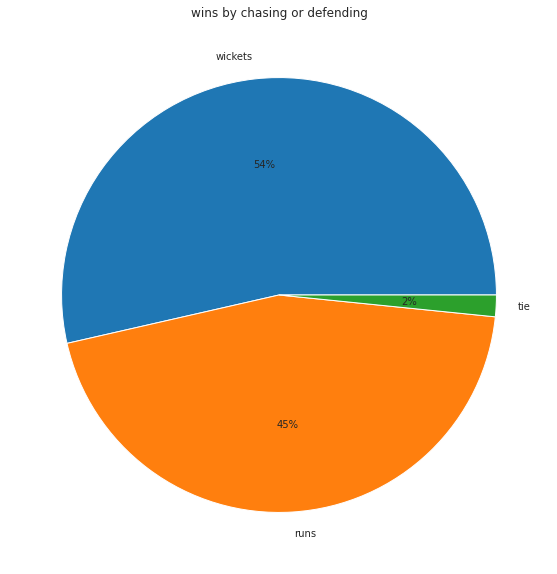

In [ ]:
bar,ax = plt.subplots(figsize=(15,10))
ax = plt.pie(x =result_count,labels =result_count.keys() ,autopct = '%.0f%%' )
plt.title("wins by chasing or defending")
plt.show()

#It looks like most of matches was won by chasing followed by won by defending
### and if we look, there are only 13 matches were tie it means among all the matches there is only 2% chance to tie match

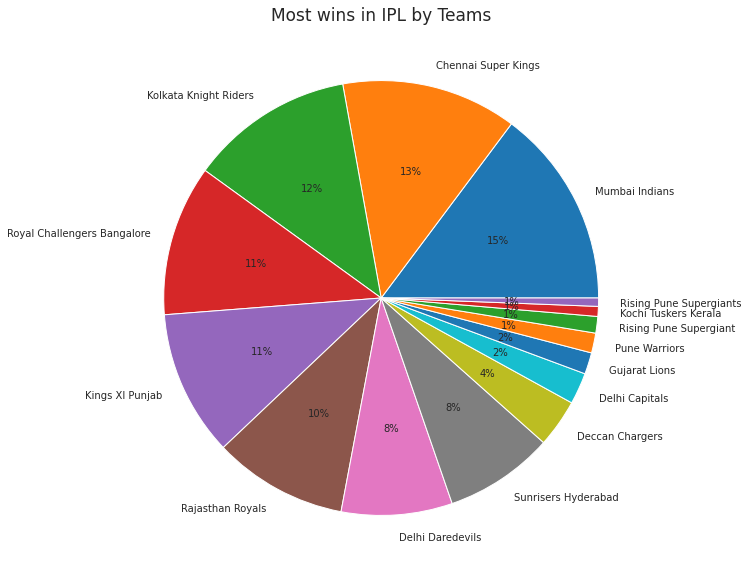

In [ ]:
bar, ax=plt.subplots(figsize=(20,10))
ax = plt.pie(x = counts,labels = counts.keys(),autopct = '%.0f%%')
plt.title('Most wins in IPL by Teams',fontsize = 17)
plt.show()

#This pie charts  indicates MI, CSK and KKR has better winrate compare to other teams

In [ ]:
df.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri


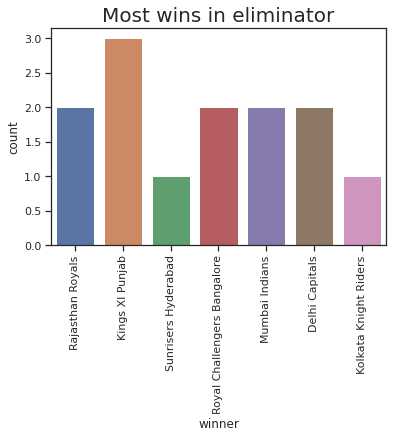

In [ ]:
sns.countplot(x = df['winner'][df['eliminator']=='Y'],data = df)
plt.xticks(rotation=90)
plt.title('Most wins in eliminator',fontsize = 20)
plt.show()

#It looks like KXIP has more winrate in eliminator followed by RR, RCB, MI, CSK...


In [ ]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [ ]:
teams = df['toss_winner'].unique()
teams

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
decision_making = pd.DataFrame([],columns = ["Toss Winner","Decision","Times"])
for id, t in enumerate(teams):
  df_bat = df[(df['toss_winner']==t) & ((df['toss_decision']=='bat'))]
  df_field = df[(df['toss_winner']==t) & ((df['toss_decision']=='field'))]

  decision_making = decision_making.append({'Toss Winner':t,'Decision':'bat','Times':df_bat['toss_winner'].count()},ignore_index=True)
  decision_making = decision_making.append({'Toss Winner':t, 'Decision':'field','Times':df_field['toss_winner'].count()},ignore_index=True)

In [ ]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


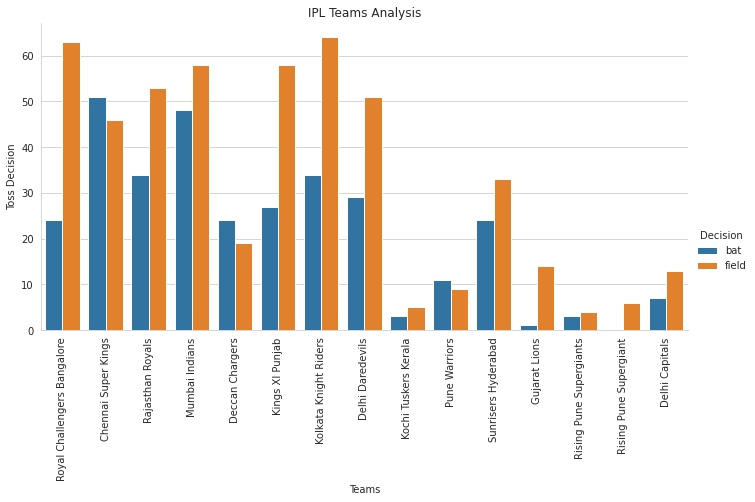

In [ ]:
sns.catplot(x = 'Toss Winner', y = 'Times', hue = 'Decision', data = decision_making, kind = 'bar',
            height = 5, aspect = 2)
plt.xlabel('Teams')
plt.ylabel('Toss Decision')
plt.title('IPL Teams Analysis')
plt.xticks(rotation = 90)
plt.show()

# By the above bar chart only CSK, DC and PW prefers batting over fielding


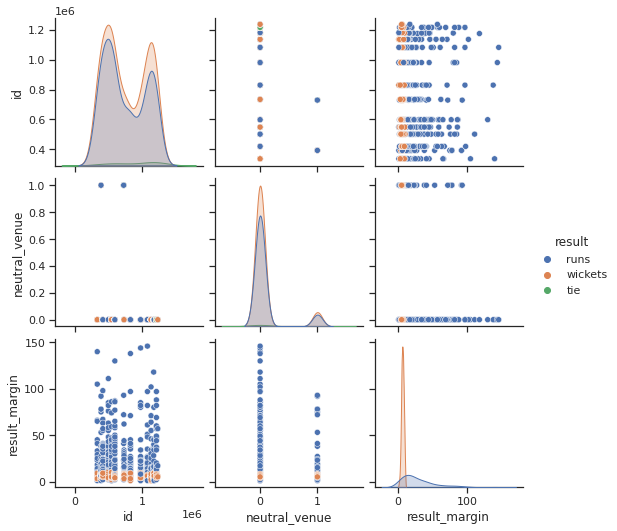

In [ ]:
sns.pairplot(df, hue='result',diag_kind='kde')
sns.set_theme(style='ticks')

#If we observe above plot closely, it also says there is high winrate by chasing teams

#### because this was T20 matches

In [ ]:
df['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

In [ ]:
df.sample(4)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
423,733981,Delhi,2014-05-05,DR Smith,Feroz Shah Kotla,0,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,8.0,N,RM Deshpande,BNJ Oxenford
696,1175356,Chennai,2019-03-23,Harbhajan Singh,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,field,Chennai Super Kings,wickets,7.0,N,AY Dandekar,BNJ Oxenford
735,1178415,Jaipur,2019-04-22,RR Pant,Sawai Mansingh Stadium,0,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,6.0,N,A Nand Kishore,S Ravi
369,598045,Bangalore,2013-05-14,AC Gilchrist,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,HDPK Dharmasena,S Ravi


In [ ]:
v = df['neutral_venue'] == '1'
v.value_counts()

False    816
Name: neutral_venue, dtype: int64

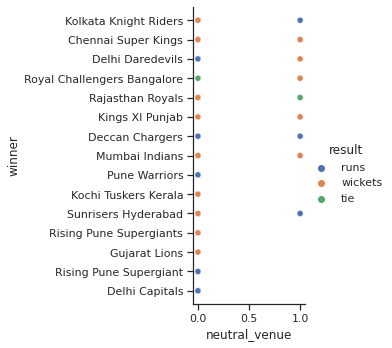

In [ ]:
sns.relplot(data=df,x='neutral_venue',y='winner',hue='result')
plt.show()